<a target="_blank" href="https://colab.research.google.com/github/alejandrogtz/cccs630-fall2023/blob/main/module12/evolutionary_algorithms_applications.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Applications of Evolutionary Algorithms

## Introduction

In this module, we will apply evolutionary algorithms to solve routing problems. Please watch the following video about the travelling salesperson problem in preparation for the module's interaction portion.

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ov0EetgMws4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Concepts

You will find a list of important concepts we will review in the module below.

- Traveling salesperson problem
- Optimization
- Routes

## Interaction

In [ ]:
#pip install deap

In [2]:
import numpy as np
import random
import pandas as pd
import math
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
#import contextily as ctx

In [3]:
data = pd.read_excel('points_of_interest.xlsx', sheet_name='points_of_interest') # Load the data into a Pandas Dataframe

In [4]:
data

,ID,Famille,Catégorie,Nom français,Nom court,Type,Numéro,rue,Étage,Bureau,Ville,Code postal,Arrondissement,Classification,Longitude,Latitude
0,1,Culturel,Établissement culturel,Maison du Meunier,NaN,Musée et centre d'interprétation / d'exposition,10897,Rue du Pont,0,,Montréal,H2B 1Z4,Ahuntsic-Cartierville,niveau 3,-73.661102,45.574862
1,2,Culturel,Établissement culturel,Maison du Pressoir,NaN,Musée et centre d'interprétation / d'exposition,10865,Rue du Pressoir,0,,Montréal,H2B 2L1,Ahuntsic-Cartierville,niveau 3,-73.659553,45.575970
2,3,Commercial,Regroupement de commerces,Marché Central,NaN,Centre commercial,9187,Boulevard de l'Acadie,0,,Montréal,H4N 3K1,Ahuntsic-Cartierville,niveau 1,-73.654956,45.534023
3,4,Culturel,Établissement culturel,Musée des Sœurs de la Providence,NaN,Musée et centre d'interprétation / d'exposition,12055,Rue Grenet,0,,Montréal,H4J 2J5,Ahuntsic-Cartierville,niveau 3,-73.713635,45.529374
4,5,Récréatif / sportif,Parc et autre espace vert,Parc Ahuntsic,NaN,Parc,,,0,,Montréal,H3L 2E5,Ahuntsic-Cartierville,niveau 2,-73.664710,45.555801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3458,Récréatif / sportif,Équipement communautaire,Centre Appleton,NaN,Organisme communautaire et centre de loisirs,6585,Chemin de la Côte-des-Neiges,0,,Montréal,H3S 2A5,Côte-des-Neiges–Notre-Dame-de-Grâce,niveau 3,-73.635287,45.502481
3227,3459,Commercial,Regroupement de commerces,Les Galleries d'Anjou,NaN,Centre commercial,7999,"Boulevard des Galeries d'Anjou,",0,,Montréal,H1M 1W9,Anjou,niveau 1,-73.564512,45.600636
3228,3460,Commercial,Regroupement de commerces,Place Bourassa,NaN,Centre commercial,6000,Boulevard Henri-Bourassa,0,,Montréal,H1G 2T6,Montréal-Nord,niveau 2,-73.616778,45.606041
3229,3461,Commercial,Regroupement de commerces,Place Vertu,NaN,Centre commercial,3131,Boulevard de la Côte-Vertu,0,,Montréal,H4R 1Y8,Saint-Laurent,niveau 1,-73.706614,45.498756


In [5]:
data['Longitude']

0      -73.661102
1      -73.659553
2      -73.654956
3      -73.713635
4      -73.664710
          ...    
3226   -73.635287
3227   -73.564512
3228   -73.616778
3229   -73.706614
3230   -73.615478
Name: Longitude, Length: 3231, dtype: float64

In [6]:
data.Longitude

0      -73.661102
1      -73.659553
2      -73.654956
3      -73.713635
4      -73.664710
          ...    
3226   -73.635287
3227   -73.564512
3228   -73.616778
3229   -73.706614
3230   -73.615478
Name: Longitude, Length: 3231, dtype: float64

In [7]:
data.loc[0] # Access the first row via its primary label

ID                                                              1
Famille                                                  Culturel
Catégorie                                  Établissement culturel
Nom français                                    Maison du Meunier
Nom court                                                     NaN
Type              Musée et centre d'interprétation / d'exposition
Numéro                                                      10897
rue                                                   Rue du Pont
Étage                                                           0
Bureau                                                           
Ville                                                    Montréal
Code postal                                               H2B 1Z4
Arrondissement                              Ahuntsic-Cartierville
Classification                                           niveau 3
Longitude                                              -73.661102
Latitude  

In [8]:
np.random.seed(1)  # For reproducible results

In [9]:
data = data.sample(n=50)

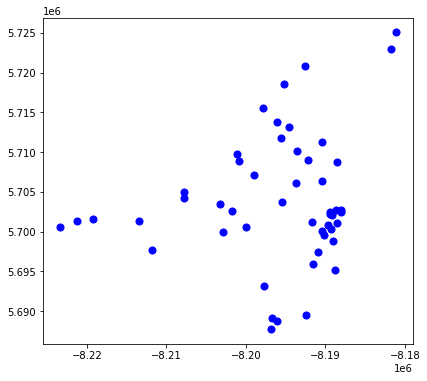

In [10]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Set the coordinate reference system (CRS) to WGS84 (epsg:4326)
gdf.crs = "EPSG:4326"

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
gdf.to_crs(epsg=3857).plot(ax=ax, color='blue', marker='o', markersize=50)

# Add basemap
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Show the plot
plt.show()

In [11]:
def geographic_to_cartesian(row):
    # Convert latitude and longitude from degrees to radians
    
    lat = row['Longitude']
    lon = row['Latitude']
    lat, lon = map(math.radians, [lat, lon])

    # Earth radius in kilometers
    R = 6371

    # Convert to Cartesian coordinates
    x = R * math.cos(lat) * math.cos(lon)
    y = R * math.cos(lat) * math.sin(lon)
    z = R * math.sin(lat)

    return x, y, z

In [12]:
data['x'], data['y'], data['z']  = zip(*data.apply(geographic_to_cartesian, axis=1))

In [13]:
data

,ID,Famille,Catégorie,Nom français,Nom court,Type,Numéro,rue,Étage,Bureau,Ville,Code postal,Arrondissement,Classification,Longitude,Latitude,x,y,z
1613,1734,Service public,Service de santé,CLSC de La Petite-Patrie,NaN,CLSC,6520,Rue De Saint-Vallier,0,,Montréal,H2S 2P7,Rosemont–La Petite-Patrie,niveau 3,-73.605193,45.534813,1259.625939,1283.363534,-6111.952350
1710,1841,Récréatif / sportif,Parc et autre espace vert,Parc Isaac-Abrabanel,NaN,Parc,,,0,,Montréal,H4T 1Z9,Saint-Laurent,niveau 4,-73.687758,45.495813,1254.324223,1276.223049,-6114.537307
2906,3134,Récréatif / sportif,Parc et autre espace vert,Jardin communautaire Le Goupillier,NaN,Jardin communautaire,,"Sur la 54e Rue, entre le Boulevard Pie-IX et l...",0,,Montréal,,Villeray–Saint-Michel–Parc-Extension,niveau 4,-73.626190,45.583352,1256.970623,1282.830296,-6112.610922
2087,2279,Service public,Transport,20-428,NaN,Poste d'attente de taxis,,au 1005 Rue Guy (Hotel Espresso). Poste privé ...,0,,Montréal,,Ville-Marie,niveau 3,-73.573929,45.493500,1262.888672,1284.833242,-6110.970196
2380,2589,Culturel,Art public,"Daudelin, Charles, Mastodo, 1984",Mastodo,Art public,,,0,,Montréal,,Ville-Marie,niveau 3,-73.554686,45.511794,1263.916565,1286.700513,-6110.364777
1273,1349,Récréatif / sportif,Parc et autre espace vert,Parc d'À-Ma-Baie,NaN,Parc,,,0,,Montréal,,Pierrefonds-Roxboro,niveau 2,-73.782722,45.504673,1247.022359,1269.186200,-6117.494800
584,622,Culturel,Lieu de diffusion,Centre culturel et communautaire Henri-Lemieux...,Centre culturel et communautaire Henri-Lemieux,Lieu de diffusion municipal,7644,Rue Édouard,0,,Montréal,H8P 1T3,LaSalle,niveau 1,-73.594246,45.430660,1262.776278,1281.903569,-6111.608652
3076,3308,Service public,Transport,Gare Montréal-Ouest,Montréal-Ouest,Gare de train,7499,Avenue Harley,0,,Montréal,,Côte-des-Neiges–Notre-Dame-de-Grâce,niveau 2,-73.641875,45.453661,1258.697253,1278.789167,-6113.102362
2355,2562,Culturel,Bâtiment et lieu d'intérêt,Chalet du mont Royal,NaN,Bâtiment historique / patrimonial,1196,Voie Camillien-Houde,0,,Montréal,,Ville-Marie,niveau 1,-73.587501,45.503945,1261.639834,1284.030877,-6111.396783
3011,3243,Culturel,Lieu de diffusion,Centre Design et Impression Textile,NaN,Galerie d'art,4710,Rue Saint-Ambroise,0,326,Montréal,H4C 2C7,Le Sud-Ouest,niveau 4,-73.585806,45.470393,1262.518333,1283.420707,-6111.343530


In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

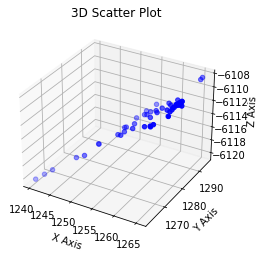

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['x'], data['y'], data['z'], c='b', marker='o')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.title('3D Scatter Plot')
plt.show()

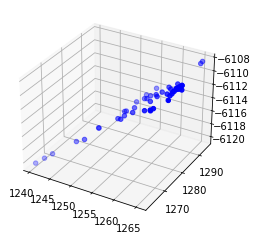

In [16]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

rc('animation', html='html5')

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(data['x'], data['y'], data['z'], c='b', marker='o')

# Function to update the view when called
def update(num, scatter, ax):
    ax.view_init(elev=num, azim=num)

# Create an animation by rotating the view
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), fargs=(scatter, ax), interval=50)

# Display the animation
plt.show()

In [17]:
# Display the animation.
ani

In [18]:
coordinates = data[['x', 'y','z']].to_numpy()

In [19]:
coordinates

array([[ 1259.6259393 ,  1283.36353442, -6111.95235024],
       [ 1254.32422292,  1276.22304904, -6114.53730653],
       [ 1256.97062316,  1282.83029554, -6112.61092213],
       [ 1262.8886722 ,  1284.83324205, -6110.97019644],
       [ 1263.916565  ,  1286.7005126 , -6110.36477697],
       [ 1247.02235949,  1269.1862003 , -6117.49479966],
       [ 1262.77627758,  1281.90356936, -6111.60865171],
       [ 1258.69725287,  1278.78916678, -6113.10236235],
       [ 1261.63983387,  1284.0308773 , -6111.39678271],
       [ 1262.5183328 ,  1283.42070739, -6111.34353045],
       [ 1259.95587271,  1278.92274862, -6112.81512905],
       [ 1241.81503048,  1263.87774958, -6119.65272415],
       [ 1262.72287138,  1284.0533022 , -6111.16838806],
       [ 1263.81019437,  1286.2031842 , -6110.49148281],
       [ 1264.45834731,  1285.1952908 , -6110.5694622 ],
       [ 1263.01867006,  1285.70489407, -6110.75999892],
       [ 1263.76712481,  1285.52161605, -6110.6438146 ],
       [ 1256.89197377,  1284.0

In [20]:
# Greedy approach
def greedy_tsp(coordinates):
    remaining_locations = list(range(len(coordinates)))
    path = [remaining_locations.pop(0)] # Start from the first location
    while remaining_locations:
        current_location = path[-1]
        next_location = min(remaining_locations, key=lambda location: np.linalg.norm(coordinates[current_location] - coordinates[location]))
        path.append(next_location)
        remaining_locations.remove(next_location)
    return path

In [21]:
greedy_route = greedy_tsp(coordinates)

In [22]:
# Calculate the total distance of the travel route

# Calculate Euclidean distance between two locations
def distance(from_location, to_location):
    return np.linalg.norm(coordinates[from_location] - coordinates[to_location])

# Evaluate the total distance of the route
def evaluate(route):  
    distance_sum = sum(distance(route[i], route[i+1]) for i in range(len(route) - 1))
    distance_sum += distance(route[0], route[-1])  # Return to the starting location
    return distance_sum,

In [23]:
print("Route (Greedy Approach): ", greedy_route)
print("Route Distance (Greedy Approach): ", evaluate(greedy_route))

Route (Greedy Approach):  [0, 35, 45, 36, 2, 17, 22, 26, 8, 9, 12, 34, 3, 24, 42, 15, 25, 46, 30, 13, 4, 20, 16, 14, 47, 33, 29, 6, 41, 10, 31, 7, 37, 23, 18, 39, 28, 1, 44, 27, 32, 40, 5, 19, 11, 43, 48, 49, 38, 21]
Route Distance (Greedy Approach):  (122.56455545609326,)


In [ ]:
from deap import base, creator, tools, algorithms

num_locations = len(coordinates)

# Set up DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

def main():
    pop = toolbox.population(n=500)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 500, stats=stats, halloffame=hof, verbose=True)

    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main()
    best_route = hof[0]
    print(f"Best Route (Genetic Algorithm): {best_route}")
    print(f"Route Distance (Genetic Algorithm): {evaluate(best_route)[0]}")

## Assignment 

### Conceptual Option

Pending.

### Hands-on Option

Pending.